# Introduction

In [1]:
# Download the Challenge Data:
#!download -c football-match-probability-prediction

# Setup

In [2]:
# Install Missing Packages
#!pip install pandas
#!pip install pandas-profiling
#!pip install ipywidgets
#!pip install torch
#!pip install pyspark
#!pip install sklearn

In [3]:
#Load Neccessary Libraries
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import torch # Work with it!
import pyspark # Work with it!
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline 

#Load secondary libraries
import warnings
warnings.filterwarnings('ignore')


In [4]:
df_test = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv', error_bad_lines=False, index_col=False, dtype='unicode')
df_train_target_score = pd.read_csv('data/train_target_and_scores.csv')
df_sample_submission = pd.read_csv('data/sample_submission.csv')

# Exploratory Data Analysis

In [5]:
# Info about Dataframe..
#df_train.describe()
#df_train.info()
#df_train.head()
#df_train.size
print(df_train.shape)
print(df_train_target_score.shape)
print(df_test.shape)
print(df_sample_submission.shape)

(110938, 190)
(110938, 3)
(72711, 189)
(72711, 4)


In [6]:
# Grab the columns names
df_columns = df_train.columns

In [7]:
# Pandas Profile
# Profile reduced to the descriptive columns only
#profile = ProfileReport(df_train.iloc[:,0:10], title="Pandas Profiling Report", explorative=False)
#profile.to_notebook_iframe()

## Counting individual target values

home    48113
away    35174
draw    27651
Name: target, dtype: int64


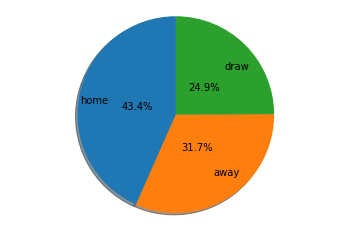

In [8]:
sizes = df_train.target.value_counts()
print(sizes)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'home', 'away', 'draw'

explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=0.4, labeldistance=0.7)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

float64
float64
int64


<BarContainer object of 17 artists>

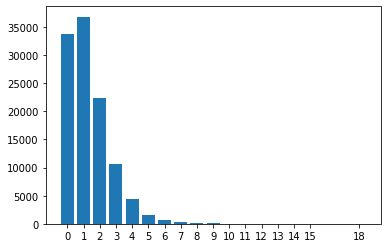

In [15]:
print(df_train.home_team_history_goal_1.dtype)
df_train.home_team_history_goal_1 = df_train.home_team_history_goal_1.astype('float')
print(df_train.home_team_history_goal_1.dtype)
df_train.home_team_history_goal_1 = df_train.home_team_history_goal_1.astype('int')
print(df_train.home_team_history_goal_1.dtype)
x = df_train.home_team_history_goal_1.value_counts().sort_index()
plt.bar(x.index,x, tick_label=x.index)

In [13]:
df_train.home_team_history_goal_1.unique()

array([ 0.,  3.,  1.,  2.,  4.,  5.,  7., 11.,  6., nan, 12.,  8.,  9.,
       10., 18., 14., 13., 15.])

# Feature Engineering

## Missing Values

In [ ]:
df_train.isna().sum()

In [14]:
df_train.fillna(0.0, inplace=True)

In [16]:
df_train.isna().sum()

id                                0
target                            0
home_team_name                    0
away_team_name                    0
match_date                        0
                                 ..
away_team_history_league_id_6     0
away_team_history_league_id_7     0
away_team_history_league_id_8     0
away_team_history_league_id_9     0
away_team_history_league_id_10    0
Length: 190, dtype: int64

# Pre-Processing

## Remove not required data

In [ ]:
# Remove the DATE columns
for col in df_columns:
    if 'date' in col:
        df_train.drop(col, axis=1, inplace=True)
                
# Remove the CUP columns
for col in df_columns:
    if 'cup' in col:
        df_train.drop(col, axis=1, inplace=True)
        
# Remove the COACH columns
for col in df_columns:
    if 'coach' in col:
        df_train.drop(col, axis=1, inplace=True) 
        
# Remove the LEAGUE columns
for col in df_columns:
    if 'league' in col:
        df_train.drop(col, axis=1, inplace=True) 
        
print(df_train.shape)

In [ ]:
df_train.iloc[0,0:10]

## Train-Test Split

In [ ]:
# Random seed set here for entire notebook
seed = 42

# Assign the data to x, y
y = df_train.target 
X = df_train.iloc[:,4:-1]

# Normalize Data
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# Split the data..
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=seed)

In [ ]:
X_norm

# Prediction

## Base Model: SVM

### Fitting

In [ ]:
SVM_classifier = svm.LinearSVC(verbose=True)
SVM_classifier.fit(X_train, y_train)

### Prediction

In [ ]:
y_pred = SVM_classifier.predict(X_test)

### Evaluation

In [ ]:
target_names = ['home', 'draw', 'away']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
titles_options = [("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true")]

class_names = target_names
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        SVM_classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    #print(title)
    #print(disp.confusion_matrix)

plt.show()

## Advanced Model: CNN

## Fitting

## Prediction

## Evaluation

# Visualisation

# Output

## Transfrom according sample submission